In [1]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore') 

In [2]:
#import data
train_df = pd.read_csv("../Dataset/train.csv")
test_df = pd.read_csv("../Dataset/test.csv")

# Data inspection

In [3]:
train_df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
test_df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


shape of dataframe: (36992, 25)

Variable types:
 object     19
float64     3
int64       3
dtype: int64 AxesSubplot(0.260833,0.125;0.503333x0.755)


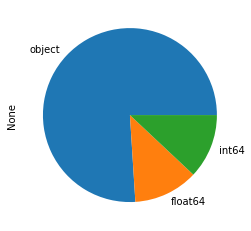

In [5]:
#shape of dataset 
print("shape of dataframe:", train_df.shape)
#data types 
print("\nVariable types:\n", train_df.dtypes.value_counts(),train_df.dtypes.value_counts().plot.pie())
plt.draw()

shape of dataframe: (19919, 24)

Variable types:
 object     19
float64     3
int64       2
dtype: int64 AxesSubplot(0.260833,0.125;0.503333x0.755)


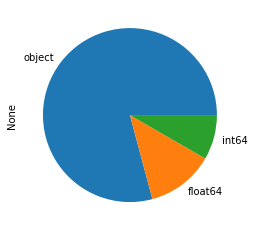

In [6]:
#shape of dataset 
print("shape of dataframe:", test_df.shape)
#data types 
print("\nVariable types:\n", test_df.dtypes.value_counts(),test_df.dtypes.value_counts().plot.pie())
plt.draw()

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

# Data Cleaning

In [9]:
train_df = train_df.drop(['Name', 'referral_id'], axis=1)  # dropping unnecessary columns 
train_df

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,31,F,SVZXCWB,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,Credit/Debit Card Offers,Desktop,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,Gift Vouchers/Coupons,Desktop,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [10]:
test_df = test_df.drop(['Name', 'referral_id'], axis=1)
test_df

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,Without Offers,Smartphone,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,Without Offers,Desktop,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,Gift Vouchers/Coupons,Both,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,Credit/Debit Card Offers,?,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,Without Offers,Smartphone,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,fffe43004900440035003600330037003800,12,M,2V0HA0O,NaN,Gold Membership,2015-01-25,No,Without Offers,Desktop,...,16,103.57,46279.35,18.0,708.120000,No,Yes,No,Not Applicable,Poor Product Quality
19915,fffe43004900440032003900370037003100,40,F,VJGQD6Q,Village,No Membership,2017-12-31,Yes,Without Offers,Desktop,...,21,63.19,23466.26,Error,574.340000,No,Yes,No,Not Applicable,No reason specified
19916,fffe43004900440036003100310036003700,55,M,ADE7LWA,Town,No Membership,2015-09-09,No,Credit/Debit Card Offers,Desktop,...,18,68.72,17903.75,24.0,564.300000,No,Yes,Yes,Unsolved,No reason specified
19917,fffe43004900440034003200330033003600,17,F,A35KUBS,City,Silver Membership,2016-04-17,Yes,Credit/Debit Card Offers,Smartphone,...,3,119.54,14057.09,22.0,606.340000,No,Yes,No,Not Applicable,Poor Website


# Checking Null Values

In [11]:
#ratio of null values
train_df.isnull().sum()/test_df.shape[0]*100

customer_id                      0.000000
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 27.250364
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
preferred_offer_types            1.445856
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                17.285004
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

In [12]:
#ratio of null values
test_df.isnull().sum()/test_df.shape[0]*100

customer_id                      0.000000
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.799940
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
preferred_offer_types            0.798233
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.854912
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
dtype: float64

# Treating Null Values

In [13]:
train_df['region_category'] = train_df['region_category'].fillna(train_df['region_category'].mode()[0])
train_df['preferred_offer_types'] = train_df['preferred_offer_types'].fillna(train_df['preferred_offer_types'].mode()[0])
train_df['points_in_wallet'] = train_df['points_in_wallet'].fillna(train_df['points_in_wallet'].mean())


test_df['region_category'] = test_df['region_category'].fillna(test_df['region_category'].mode()[0])
test_df['preferred_offer_types'] = test_df['preferred_offer_types'].fillna(test_df['preferred_offer_types'].mode()[0])
test_df['points_in_wallet'] = test_df['points_in_wallet'].fillna(test_df['points_in_wallet'].mean())


In [14]:
#checking null values is present or not
print(train_df.info())
print('-'*50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               36992 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   preferred_offer_types         36992 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

# DATA VISUALIZATION

<AxesSubplot:xlabel='age', ylabel='Density'>

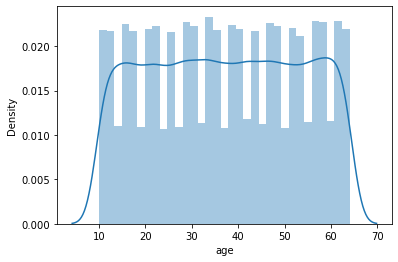

In [15]:
sb.distplot(train_df.age)   #age is uniformly distributed

In [16]:
train_df["gender"].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [17]:
train_df[train_df.gender == "Unknown"]

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
931,fffe43004900440031003500390037003700,13,Unknown,TF082U8,Town,No Membership,2016-06-22,No,Credit/Debit Card Offers,Smartphone,...,84.850000,24412.90,29.0,657.150000,No,Yes,No,Not Applicable,Poor Product Quality,5
1083,fffe43004900440035003300310032003700,57,Unknown,D213GXR,Town,Premium Membership,2015-07-13,Yes,Gift Vouchers/Coupons,Smartphone,...,353.370000,42194.47,14.0,705.040000,Yes,Yes,No,Not Applicable,Too many ads,3
1668,fffe43004900440034003200330033003300,40,Unknown,LUSZ08K,City,Premium Membership,2016-02-20,No,Gift Vouchers/Coupons,Desktop,...,121.160000,88003.76,3.0,838.580000,No,Yes,Yes,No Information Available,Products always in Stock,1
1843,fffe43004900440033003100360031003500,63,Unknown,FCFE5S7,Town,Basic Membership,2016-09-01,Yes,Credit/Debit Card Offers,Desktop,...,132.390000,34125.13,28.0,567.160000,No,Yes,Yes,Unsolved,Too many ads,5
2002,fffe43004900440032003100330031003100,26,Unknown,9HGPISM,City,Basic Membership,2017-05-07,?,Without Offers,Smartphone,...,259.820000,21380.00,Error,686.882199,No,Yes,No,Not Applicable,Poor Website,5
2009,fffe43004900440034003200340032003000,12,Unknown,52J0SCU,City,Platinum Membership,2016-10-02,No,Gift Vouchers/Coupons,Desktop,...,-743.662389,53502.22,14.0,798.420000,Yes,Yes,Yes,No Information Available,Products always in Stock,2
2354,fffe43004900440035003200380031003700,17,Unknown,37X1PDZ,Town,Platinum Membership,2016-01-19,No,Gift Vouchers/Coupons,Both,...,345.630000,47045.76,28.0,391.889304,Yes,No,Yes,Unsolved,Poor Product Quality,3
3012,fffe43004900440032003200370033003100,51,Unknown,1FZ9LXL,Village,Gold Membership,2016-03-23,No,Gift Vouchers/Coupons,Desktop,...,39.720000,9715.89,16.0,783.140000,No,Yes,No,Not Applicable,Poor Product Quality,3
3278,fffe43004900440036003100330030003500,63,Unknown,6KGICZ5,City,No Membership,2016-01-31,No,Credit/Debit Card Offers,Desktop,...,185.570000,11549.49,19.0,709.200000,No,Yes,Yes,Solved in Follow-up,Poor Website,4
5020,fffe43004900440032003000370038003500,18,Unknown,UKPDOET,Town,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,...,221.570000,12808.70,7.0,686.882199,Yes,No,Yes,Solved in Follow-up,No reason specified,3


In [18]:
train_df.drop(train_df.index[train_df['gender'] == 'Unknown'],axis = 0,  inplace = True)

<AxesSubplot:xlabel='gender', ylabel='count'>

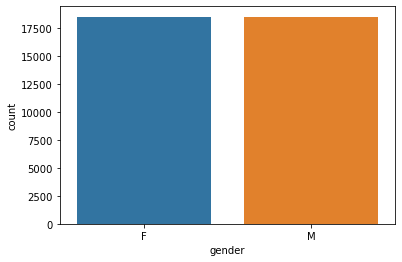

In [19]:
sb.countplot(train_df.gender) #male and female is equaly distributed

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

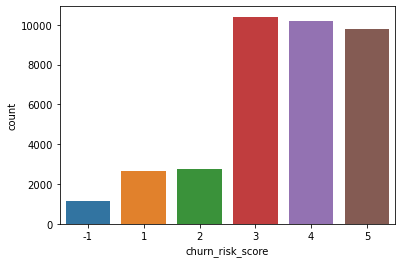

In [20]:
# checking the distribution of outcomes
sb.countplot(x = 'churn_risk_score', data = train_df)

<AxesSubplot:xlabel='gender', ylabel='count'>

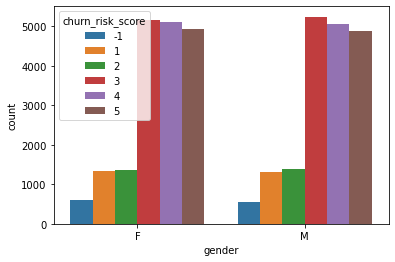

In [21]:
sb.countplot(train_df.gender,hue=train_df.churn_risk_score)

In [22]:
cat = []
con = []
for i in train_df.columns:
    if (train_df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Data Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
for i in cat:
    test_df[i]=label_encoder.fit_transform(test_df[i])

In [25]:
for i in cat:
    train_df[i]=label_encoder.fit_transform(train_df[i])  

In [26]:
convert = ["avg_time_spent","avg_transaction_value","points_in_wallet"]
for k in convert:
    train_df[k] = train_df[k].astype(int)

In [27]:
for k in convert:
    test_df[k] = test_df[k].astype(int)

In [28]:
train = train_df.drop(['points_in_wallet'],axis = 1)
test = test_df.drop(['points_in_wallet'],axis = 1)

In [29]:
X= train.drop(columns = ['churn_risk_score'], axis=1)
y= train[['churn_risk_score']]

In [30]:
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(X)

### Checking Variance

In [31]:
train_df.columns

Index(['customer_id', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

In [32]:
# checking variance
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = train_df[['customer_id', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [33]:
vif

,VIF,Features
0,3.924364,customer_id
1,6.075019,age
2,1.978020,gender
3,3.874535,security_no
4,2.407517,region_category
5,2.938436,membership_category
6,3.875618,joining_date
7,4.200611,joined_through_referral
8,2.468713,preferred_offer_types
9,4.515936,medium_of_operation


# model building

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) 

In [35]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,...,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04,3.693300e+04
mean,5.961741e-18,1.286746e-16,-6.905128e-16,2.498024e-17,-1.581646e-16,-4.173294e-16,-5.091040e-17,-9.762285e-16,-6.617572e-16,3.251537e-16,...,7.381647e-17,1.451049e-16,-9.994352e-17,-8.344784e-18,1.654588e-16,-4.802640e-16,-1.124243e-15,-2.190566e-16,1.324043e-16,8.239572e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.732004e+00,-1.708991e+00,-9.987282e-01,-1.732004e+00,-1.201560e+00,-1.291319e+00,-1.731006e+00,-1.817001e+00,-1.225976e+00,-1.923572e+00,...,-1.735488e+00,-4.185870e+00,-7.677165e+00,-1.464169e+00,-2.509773e+00,-1.105472e+00,-1.111113e+00,-9.942493e-01,-1.336089e+00,-1.200035e+00
25%,-8.660020e-01,-8.896862e-01,-9.987282e-01,-8.660020e-01,-1.201560e+00,-7.154646e-01,-8.721478e-01,-3.950555e-01,-1.225976e+00,1.864227e-02,...,-8.644023e-01,2.179546e-01,-4.599441e-01,-7.761956e-01,-6.629012e-01,-1.105472e+00,-1.111113e+00,-9.942493e-01,-5.142621e-01,-8.095838e-01
50%,0.000000e+00,-7.358110e-03,-9.987282e-01,0.000000e+00,3.337180e-01,-1.396097e-01,2.440530e-03,-3.950555e-01,6.272513e-03,1.864227e-02,...,1.150768e-03,2.354475e-01,-2.063118e-01,-8.827342e-02,-5.704327e-01,9.045909e-01,8.999986e-01,-9.942493e-01,-5.142621e-01,-4.191326e-01
75%,8.660020e-01,8.749700e-01,1.001273e+00,8.660020e-01,3.337180e-01,1.012100e+00,8.675909e-01,1.026890e+00,1.238521e+00,9.897494e-01,...,8.664733e-01,2.529403e-01,2.833744e-01,5.955861e-01,1.281437e+00,9.045909e-01,8.999986e-01,1.005784e+00,3.075649e-01,7.522208e-01
max,1.732004e+00,1.694275e+00,1.001273e+00,1.732004e+00,1.868996e+00,1.587955e+00,1.713865e+00,1.026890e+00,1.238521e+00,9.897494e-01,...,1.729145e+00,2.966725e-01,7.513151e+00,3.632842e+00,1.611325e+00,9.045909e-01,8.999986e-01,1.005784e+00,1.951219e+00,1.923574e+00


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)



#### Using GridSearchCV for finding best parameters

In [42]:
gs=GridSearchCV(lr,
               {
                    'penalty':('l1','l2','elasticnet'),
                   'fit_intercept':(True,False),
                    'C':np.logspace(-2,2,5),
                   'multi_class':('auto', 'ovr', 'multinomial'),
               },
                cv=2,
                n_jobs=2,
                #scoring='neg_mean_squared_error',
                verbose=2
               )

gs.fit(X_train,y_train)
lr=gs.best_estimator_
lr.fit(X_train,y_train)
print(gs.best_params_)



Fitting 2 folds for each of 90 candidates, totalling 180 fits
{'C': 0.01, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'l2'}


In [43]:
pred=lr.predict(X_test)

In [44]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.44090570635619036

#### Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#### Using GridSearchCV for finding best parameters

In [75]:
gs=GridSearchCV(clf,
               {
                   'max_depth':range(3,10),
                   'min_samples_split':range(10,100,10)
               },
                cv=5,
                n_jobs=2,
                scoring='neg_mean_squared_error',
                verbose=2
               )

gs.fit(X_train,y_train)
clf=gs.best_estimator_
clf.fit(X_train,y_train)
print(gs.best_params_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
{'max_depth': 6, 'min_samples_split': 30}


#### Making Predictions

In [76]:
pred = clf.predict(X_test)

#### Checking Accuracy

In [77]:
score = clf.score(X_test, y_test)
score

0.634357655340463

0.570867740625423

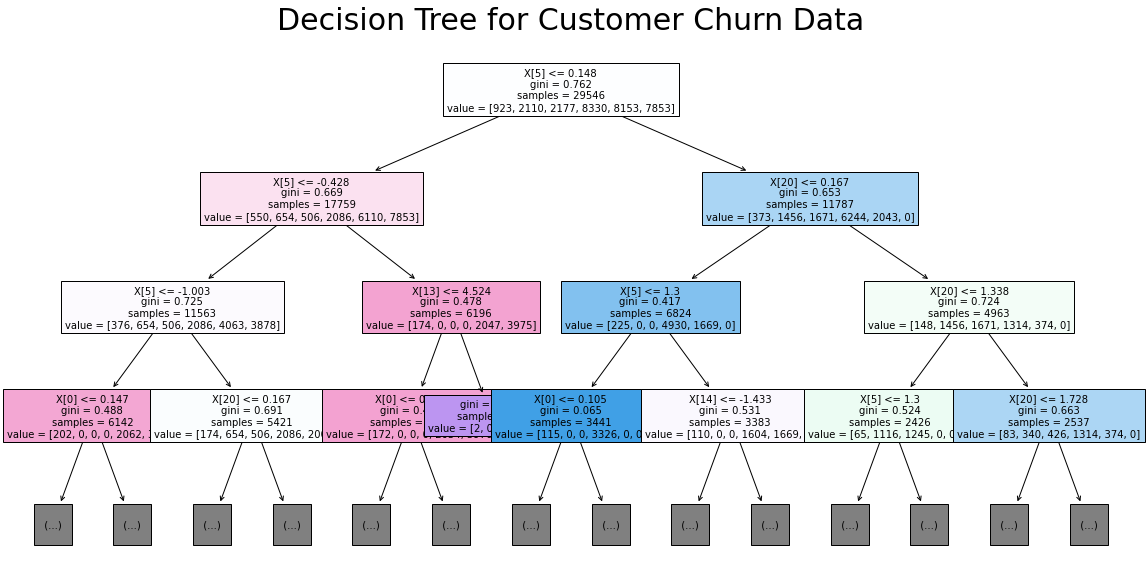

In [78]:
from sklearn import tree
s = plt.figure(figsize=(20,10))
tree.plot_tree(clf, max_depth=3, filled=True, fontsize=10)
plt.title("Decision Tree for Customer Churn Data", fontsize=30)
plt.show() 

#### Random Forrest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_split=20)

##### Randomized Grid Search CV

In [84]:
gs=RandomizedSearchCV(rf,
               {
                   'criterion':('gini', 'entropy'),
                   'n_estimators':np.linspace(50,200,5).astype(int)
                   #'min_samples_split':range(5,105,20)
               },
                cv=5,
                n_jobs=2,
                scoring='neg_mean_squared_error',
               )

gs.fit(X_train,y_train)
rf=gs.best_estimator_
rf.fit(X_train,y_train)
print(gs.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 200, 'criterion': 'gini'}


#### Prediction

In [85]:
pred1 = rf.predict(X_test)

#### Checking Accuracy

In [86]:
score1 = rf.score(X_test, y_test)
score1

0.6342222823879788

In [87]:
rf.score(X_train,y_train)

0.9349150477221959

0.6302964667659402

#### Gradient Boosting Classifier 

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500,max_depth=5)

In [97]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

#### Prediction

In [98]:
pred2 = gb.predict(X_test)

#### Checking Accuracy

In [99]:
score2 = gb.score(X_test, y_test)
score2

0.6147285772302694

0.6376066062000812


#### AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

##### Randomized Grid Search CV

In [93]:
gs=RandomizedSearchCV(ad,
               {
                   'learning_rate':np.logspace(-2,2,5),
                   'n_estimators':np.linspace(20,1020,5).astype(int),
                   'algorithm':('SAMME', 'SAMME.R')
                   
               },
                cv=2,
                n_jobs=2,
                scoring='neg_mean_squared_error',
                verbose=2
               )

gs.fit(X_train,y_train)
ad=gs.best_estimator_
ad.fit(X_train,y_train)
print(gs.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'n_estimators': 1020, 'learning_rate': 1.0, 'algorithm': 'SAMME'}


#### Prediction

In [94]:
pred3 = ad.predict(X_test)

#### Checking Accuracy

In [95]:
score3 = ad.score(X_test, y_test)
score3

0.6243400568566401

GRADIENT BOOSTING IS THE PREDICTOR AMONG THOSE MODELS